# K-means

É uma técnica de aprendizado não supervisionado usada para agrupar dados em K clusters distintos usando a distância Euclidiana. 

É amplamente utilizado em tarefas de clustering devido à sua simplicidade e eficácia.

É um algoritmo que agrupa dados em K clusters com base na proximidade dos pontos de dados. 

O objetivo é minimizar a soma das distâncias quadradas entre os pontos de dados e os centróides dos clusters.

**Funcionamento do K-Means**
* **Escolha de K:** Especificar o número de clusters K.
* **Inicialização dos Centrôides:** Selecionar K pontos como centróides iniciais (pode ser aleatório ou utilizando métodos como K-means++ para uma melhor escolha inicial).
* **Atribuição dos Pontos de Dados:** Atribuir cada ponto de dado ao centróide mais próximo, formando K clusters.
* **Recalcular Centrôides:** Calcular a média dos pontos de dados em cada cluster e atualizar a posição dos centróides.
* **Repetição:** Repetir os passos de atribuição e recalculação até que os centróides não mudem mais significativamente (convergência) ou até atingir um número máximo de iterações.

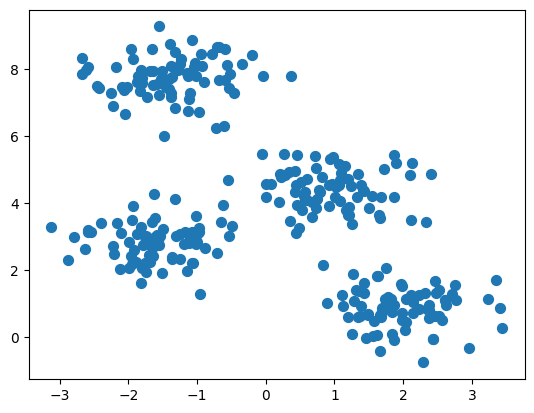

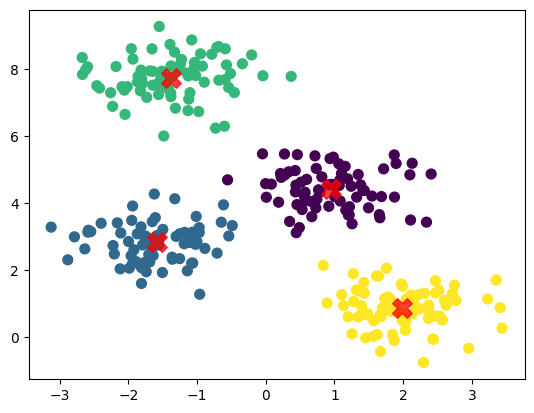

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Gerar um conjunto de dados de exemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualizar os dados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

# Criar e treinar o modelo K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Prever os clusters
y_kmeans = kmeans.predict(X)

# Visualizar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()


**Considerações ao Usar K-Means**
* **Escolha do K:** Selecionar o número adequado de clusters K é crucial. O método do cotovelo e o método da silhueta são técnicas comuns para determinar o valor ótimo de K.
* **Escalonamento dos Dados:** K-Means é sensível às escalas dos dados. Portanto, padronizar ou normalizar os dados é importante.
* **Inicialização dos Centrôides:** A escolha inicial dos centróides pode afetar o resultado final. K-means++ é um método que melhora a inicialização dos centróides.

**Método do Cotovelo**

O método do cotovelo ajuda a encontrar o número ideal de clusters (K) analisando a soma das distâncias quadradas dentro do cluster (WCSS) para diferentes valores de K.

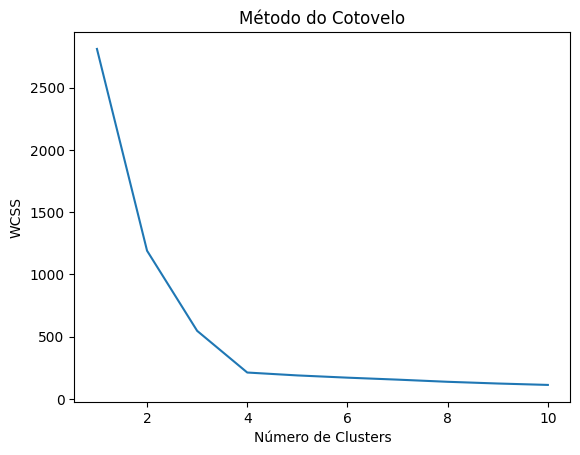

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

**Método da Silhueta**

O método da silhueta mede a qualidade de um cluster. Os coeficientes de silhueta variam de -1 a 1, onde um valor próximo a 1 indica que os pontos estão bem agrupados.

In [5]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f'Número de Clusters: {i}, Coeficiente de Silhueta: {score:.3f}')


Número de Clusters: 2, Coeficiente de Silhueta: 0.543
Número de Clusters: 3, Coeficiente de Silhueta: 0.589
Número de Clusters: 4, Coeficiente de Silhueta: 0.682
Número de Clusters: 5, Coeficiente de Silhueta: 0.592
Número de Clusters: 6, Coeficiente de Silhueta: 0.493
Número de Clusters: 7, Coeficiente de Silhueta: 0.393
Número de Clusters: 8, Coeficiente de Silhueta: 0.321
Número de Clusters: 9, Coeficiente de Silhueta: 0.335
Número de Clusters: 10, Coeficiente de Silhueta: 0.337


❇️ Exemplo

In [6]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix

In [7]:
iris = datasets.load_iris()

In [ ]:
# A função np.unique() do NumPy retorna os valores únicos de um array. 
# Quando usamos o parâmetro return_counts=True, a função também retorna a contagem de cada valor único.
unicos, quantidade = np.unique(iris.target, return_counts=True)

In [12]:
print("Valores únicos:", unicos) 
# No conjunto de dados Iris, os rótulos de classe são 0, 1 e 2, representando as três espécies de flores.

Valores únicos: [0 1 2]


In [13]:
print("Contagens:", quantidade)
# Cada uma das três classes tem 50 instâncias no conjunto de dados, totalizando 150 amostras.

Contagens: [50 50 50]


In [16]:
cluster = KMeans(n_clusters = 3)
cluster

KMeans(n_clusters=3)

In [17]:
cluster.fit(iris.data)

KMeans(n_clusters=3)

In [19]:
centroides = cluster.cluster_centers_
centroides 

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [20]:
previsoes = cluster.labels_
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
unicos2, quantidade2 = np.unique(previsoes, return_counts=True)

array([0, 1, 2], dtype=int32)

In [23]:
unicos2

array([0, 1, 2], dtype=int32)

In [24]:
quantidade2

array([50, 62, 38])

In [25]:
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

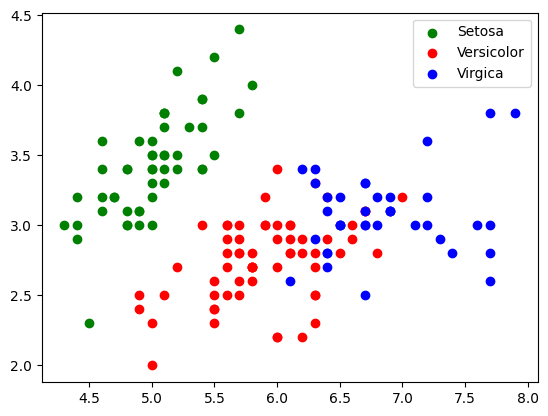

In [26]:
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()